이상치
- 정상 범주에서 크게 벗어난 값, (극단치라고도 함)
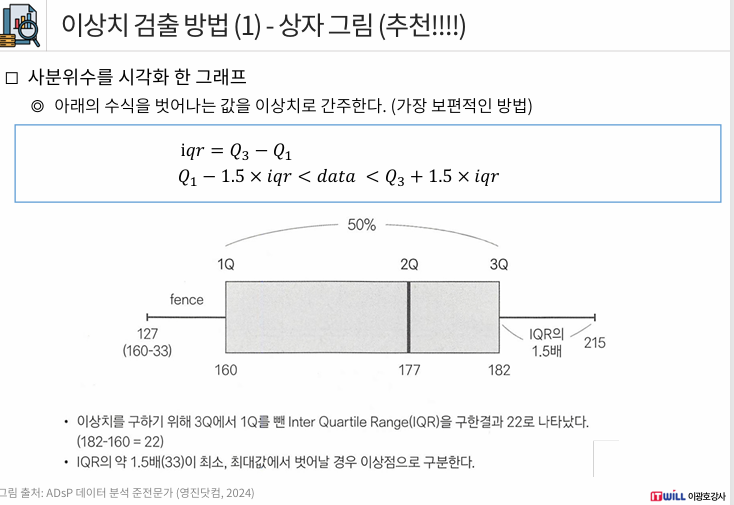

In [1]:
import numpy as np
from hossam import load_data
from pandas import DataFrame
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt

In [2]:
origin = load_data("ref_sample")
origin

[data] https://data.hossam.kr/data/lab03/ref_sample.xlsx
[desc] 데이터 정제를 위한 실습용 데이터
[!] Cannot read metadata


,kor,eng,math,sic
name,,,,
철수,98.0,77,88.0,64.0
영희,88.0,120,62.0,72.0
민철,NaN,70,83.0,79.0
수현,63.0,60,31.0,71.0
호영,75.0,50,90.0,NaN
영호,80.0,88,91.0,72.0
용식,82.0,88,NaN,90.0
나영,90.0,92,81.0,NaN
석영,91.0,90,89.0,80.0


In [3]:
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
df_imr = imr.fit_transform(origin.values)
re_df = DataFrame(df_imr, index=origin.index, columns=origin.columns)
re_df

,kor,eng,math,sic
name,,,,
철수,98.000,77.0,88.000,64.000000
영희,88.000,120.0,62.000,72.000000
민철,83.375,70.0,83.000,79.000000
수현,63.000,60.0,31.000,71.000000
호영,75.000,50.0,90.000,75.428571
영호,80.000,88.0,91.000,72.000000
용식,82.000,88.0,76.875,90.000000
나영,90.000,92.0,81.000,75.428571
석영,91.000,90.0,89.000,80.000000


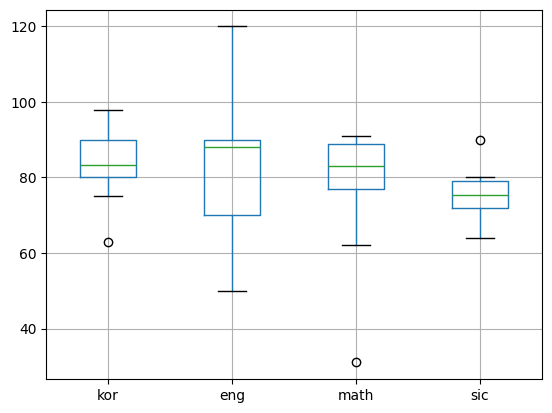

In [4]:
re_df.boxplot()
plt.show()

In [6]:
re_df.loc[re_df['eng']>100,'eng']=np.nan
re_df

,kor,eng,math,sic
name,,,,
철수,98.000,77.0,88.000,64.000000
영희,88.000,NaN,62.000,72.000000
민철,83.375,70.0,83.000,79.000000
수현,63.000,60.0,31.000,71.000000
호영,75.000,50.0,90.000,75.428571
영호,80.000,88.0,91.000,72.000000
용식,82.000,88.0,76.875,90.000000
나영,90.000,92.0,81.000,75.428571
석영,91.000,90.0,89.000,80.000000


In [7]:
imr = SimpleImputer(missing_values = np.nan, strategy="mean")
df_imr = imr.fit_transform(re_df.values)
outline_df = DataFrame(df_imr, index=re_df.index, columns=re_df.columns)
outline_df

,kor,eng,math,sic
name,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,63.000,60.000,31.000,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,90.000000
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


In [8]:
outline_df2 = outline_df.copy()
국어Q1=outline_df2['kor'].quantile(0.25)
국어Q3 = outline_df2['kor'].quantile(0.75)
국어iqr = 국어Q3 - 국어Q1
print("국어 점수의 사분위간 범위:", 국어iqr)

국어 점수의 사분위간 범위: 10.0


In [9]:
outline_max = 국어Q3 + 국어iqr * 1.5
outline_min = 국어Q1 - 국어iqr * 1.5
print("상한 극단치 경계:", outline_max)
print("하한 극단치 경계:", outline_min)

상한 극단치 경계: 105.0
하한 극단치 경계: 65.0


In [10]:
outline_df2.loc[outline_df2['kor']<outline_min, 'kor']


name
수현    63.0
Name: kor, dtype: float64

In [11]:
outline_df2.loc[outline_df['kor']<outline_min,'kor']=np.nan
outline_df2

,kor,eng,math,sic
name,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,NaN,60.000,31.000,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,90.000000
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


In [13]:
outline_df2.loc[outline_df2['kor']>outline_max,'kor']=np.nan
outline_df2

,kor,eng,math,sic
name,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,NaN,60.000,31.000,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,90.000000
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


In [ ]:
수학Q1 = outline_df2['math'].quantile(0.25)
수학Q3 = outline_df2['math'].quantile(0.75)
수학iqr = 수학Q3 - 수학Q1
outline_max = 수학Q3 + 수학iqr * 1.5
outline_min = 수학Q1 - 수학iqr * 1.5

outline_df2.loc[outline_df2['math']<outline_min,'math']=np.nan
outline_df2.loc[outline_df2['math']>outline_max,'math']=np.nan
